<a href="https://colab.research.google.com/github/SaxenaBhoomika/image-classification/blob/main/img_cla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import warnings
warnings.filterwarnings("ignore")


In [5]:
import os   #to deal with path
import shutil  #to copy file from one folder to other
import glob     #for pattern matching


In [6]:
!unzip /content/drive/MyDrive/archive.zip

Archive:  /content/drive/MyDrive/archive.zip
  inflating: test/0.jpg              
  inflating: test/1.jpg              
  inflating: test/10.jpg             
  inflating: test/11.jpg             
  inflating: test/12.jpg             
  inflating: test/13.jpg             
  inflating: test/14.jpg             
  inflating: test/15.jpg             
  inflating: test/16.jpg             
  inflating: test/17.jpg             
  inflating: test/2.jpg              
  inflating: test/3.jpg              
  inflating: test/4.jpg              
  inflating: test/5.jpg              
  inflating: test/6.jpg              
  inflating: test/7.jpg              
  inflating: test/8.jpg              
  inflating: test/9.jpg              
  inflating: train/cat.0.jpg         
  inflating: train/cat.1.jpg         
  inflating: train/cat.2.jpg         
  inflating: train/cat.3.jpg         
  inflating: train/cat.4.jpg         
  inflating: train/cat.5.jpg         
  inflating: train/cat.6.jpg         
  inf

In [7]:
!unzip /content/train.zip
!unzip /content/test1.zip

unzip:  cannot find or open /content/train.zip, /content/train.zip.zip or /content/train.zip.ZIP.
unzip:  cannot find or open /content/test1.zip, /content/test1.zip.zip or /content/test1.zip.ZIP.


In [8]:
TRAIN_DIR="./DATASET"
ORG_DIR="/content/train"
CLASS=['cat','dog']

In [9]:
for C in CLASS:
  DEST=os.path.join(TRAIN_DIR,C)
  #if directory is not present create one 

  if not os.path.exists(DEST):
    os.makedirs(DEST)
  

  for img_path in glob.glob(os.path.join(ORG_DIR,C)+"*"):
    SRC=img_path

    shutil.copy(SRC,DEST)

In [10]:
os.listdir("/content/train")


['cat.0.jpg',
 'cat.9.jpg',
 'dog.3.jpg',
 'dog.6.jpg',
 'dog.2.jpg',
 'cat.1.jpg',
 'dog.8.jpg',
 'cat.6.jpg',
 'cat.8.jpg',
 'dog.7.jpg',
 'dog.0.jpg',
 'cat.5.jpg',
 'cat.7.jpg',
 'cat.2.jpg',
 'dog.9.jpg',
 'dog.1.jpg',
 'dog.5.jpg',
 'cat.4.jpg',
 'cat.3.jpg',
 'dog.4.jpg']

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

from keras.layers import Dense,Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3,preprocess_input
from keras.preprocessing.image import ImageDataGenerator , load_img, img_to_array
import keras



In [12]:
base_model=InceptionV3(input_shape=(256,256,3),include_top=False)


87924736/87910968 [==============================] - 0s 0us/step


In [13]:
for layer in base_model.layers:
  layer.trainable=False

In [14]:
X=Flatten()(base_model.output)
X=Dense(units=2,activation='sigmoid')(X)

#Final model
model=Model(base_model.input,X)

#Compile the model
model.compile(optimizer='adam',loss=keras.losses.binary_crossentropy,metrics=['accuracy'])

#summary
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 127, 127, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 127, 127, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
#Pre Process Data Using Data Generator

In [15]:
train_datagen=ImageDataGenerator(featurewise_center=True,
                                 rotation_range=0.4,
                                 width_shift_range=0.3,
                                 horizontal_flip=True,
                                 preprocessing_function=preprocess_input,
                                 zoom_range=0.4,
                                 shear_range=0.4)

train_data=train_datagen.flow_from_directory(directory="/content/DATASET",
                                             target_size=(256,256),
                                             batch_size=64)

Found 20 images belonging to 2 classes.


In [16]:
train_data.class_indices

{'cat': 0, 'dog': 1}

In [ ]:
#Visualizing the data

In [17]:
t_img,label=train_data.next()

In [18]:
t_img.shape

(20, 256, 256, 3)

In [19]:
def plotImages(img_arr,label):
  """
  input: image array
  output: plot images
  """


  for idx , img in enumerate(img_arr):
    if idx<=10:
      plt.figure(figsize=(5,5))
      plt.imshow(img)
      plt.title(img.shape)
      plt.axis=False
      plt.show()

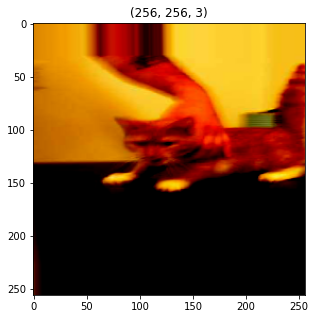

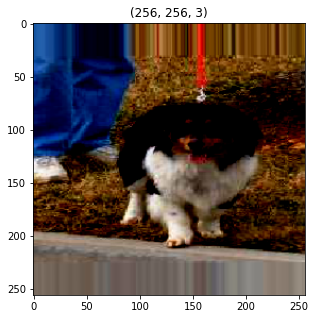

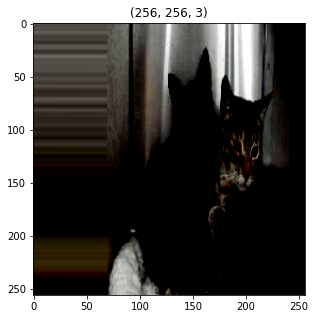

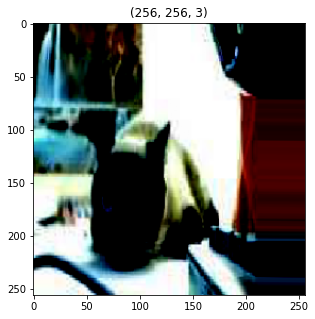

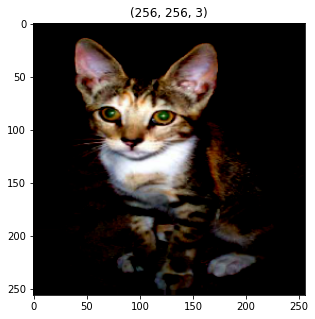

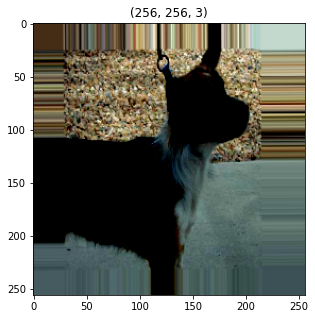

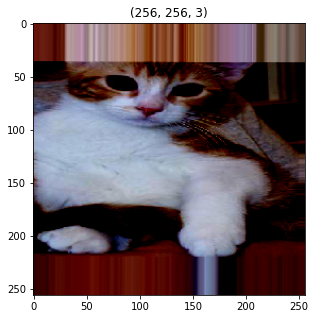

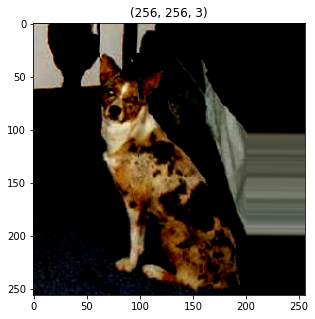

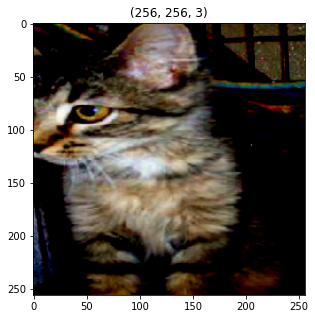

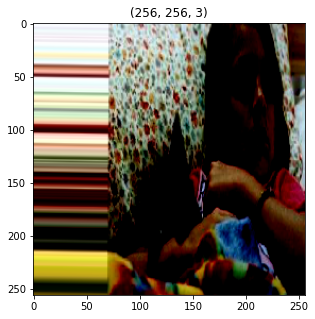

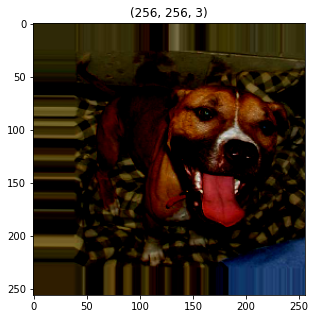

In [20]:
plotImages(t_img,label)

In [ ]:
#Model Check Point

In [21]:
from keras.callbacks import ModelCheckpoint,EarlyStopping
mc=ModelCheckpoint(filepath="./best_model.h5",
                   monitor="accuracy",
                   verbose=1,
                   save_best_only=True)


es=EarlyStopping(monitor="accuracy",
                 min_delta=0.01,
                 patience=5,
                 verbose=1)

cb=[mc,es]

In [22]:
his=model.fit_generator(train_data,
                        steps_per_epoch=10,
                        epochs=30,
                        callbacks=cb)

Epoch 1/30
 1/10 [==>...........................] - ETA: 2:21 - loss: 0.9210 - accuracy: 0.4500


Epoch 1: accuracy improved from -inf to 0.45000, saving model to ./best_model.h5
10/10 [==============================] - 16s 87ms/step - loss: 0.9210 - accuracy: 0.4500


In [23]:
from keras.models import load_model
model=load_model("/content/best_model.h5")

In [24]:
h=his.history
h.keys()
#dict_keys(['loss', 'accuracy'])


dict_keys(['loss', 'accuracy'])

In [ ]:
#Validate our model

The image is of cat


<function matplotlib.pyplot.show(*args, **kw)>

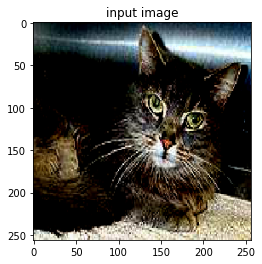

In [25]:
#path for image if it predicts correct class
path="/content/test/7.jpg"
img = load_img(path,target_size=(256,256))
i=img_to_array(img)
i=preprocess_input(i)
input_array=np.array([i])
input_array.shape
pred=np.argmax(model.predict(input_array))

if pred==0:
  print("The image is of cat")
else:
  print("The image is of dog")


#to display image

plt.imshow(input_array[0])
plt.title("input image")
plt.axis=False
plt.show

In [26]:
#gradient class activation map  (GRAD CAM)
def get_img_arr(img_path):
  """
  input: Take the image path
  output: gives pre-process image 
  """
  img = load_img(path,target_size=(256,256))
  img=img_to_array(img)
  img=preprocess_input(img)

  #expand the dimensions 
  img=np.array([i])

  return img



In [27]:
import tensorflow as tf

In [28]:
def make_gracam_heatmap(img_arr,model,last_conv_layer_name,pred_index=None):
  grad_model=tf.keras.models.Model(
      [model.input],[model.get_layer(last_conv_layer_name).output,model.output]
  )




  with tf.GradientTape() as tape:
    last_conv_layer_output,preds=grad_model(img_arr)
    if pred_index is None:
      pred_index=tf.argmax(preds[0])
    class_channel=preds[:,pred_index]


  grads=tape.gradient(class_channel,last_conv_layer_output)

  pooles_grads=tf.reduce_mean(grads,axis=(0,1,2))
  last_conv_layer_output=last_conv_layer_output[0]
  heatmap=last_conv_layer_output @ pooled_grads[...,tf.newaxis]

  heatmap=tf.squeeze(heatmap)
  hratmap=tf.maximum(heatmap,0)/tf.math.reduce_max(heatmap)
  return heatmap.numpy()



 


In [ ]:
#Mask Heatmap on image

In [29]:
import matplotlib.cm as cm
from IPython.display import Image , display

In [30]:
def save_and_display_gradcam(img_path,heatmap,cam_path="cam.jpg",alpha=0.4):
  img = img_to_array(load_img(img_path))
  heatmap=np.uint8(255*heatmap)
  jet=cm.get_cmap("jet")
  jet_colors=jet(np.arange(256))[:, :3]
  jet_heatmap=jet_colors[heatmap]


  jet_heatmap=keras.preprocessing.image.array_to_img(jet_heatmap)
  jet_heatmap=jet_heatmap.resize((img.shape[1],img.shape[0]))
  jet_heatmap=keras.preprocessing.image.img_to_array(jet_heatmap)


  superimposed_img=jet_heatmap * alpha + img
  superimposed_img=keras.preprocessing.image.array_to_img(superimposed_img)

  superimposed_img.save(cam_path)
  display(Image(cam_path))


In [37]:
def image_prediction_and_visualization(path,last_conv_layer_name="conv2d",model=model):
  img_array=get_img_array(path)
  heatmap=make_gradcam_heatmap(img_array,model,last_conv_layer_name)
  plt.title("the heat map of the image is")
  plt.imshow(heatmap)
  plt.show()
  pred=np.argmax(model.predict(preprocess_input(img_array)))
  print()
  print()
  print()
  if pred==0:
    print("The image is of cat")
  else:
    print("The image is of dog")

  print()
  print()
  print()
  print("image with heatmap representing reason on interest")


#function cal
  save_and_display_gradcam(path,heatmap)
  print()
  print("the original input image")
  print()
  a=plt.imread(path)
  plt.imshow(a,cmap="gray")
  plt.title("Original image")
  plt.show()


In [38]:
path="/content/test/2.jpg"
image_prediction_and_visualization(path)

NameError: ignored